# Multiple Linear Regression Model

The objective of this notebook is to create a 'Multiple linear regression model'. We have a database about cars and we will try to predict the CO2 Emissions base on different features about cars.

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

## Data exploration

In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


### We analyze the relation between CO2 emission and other variables plotting scatters using seaborn

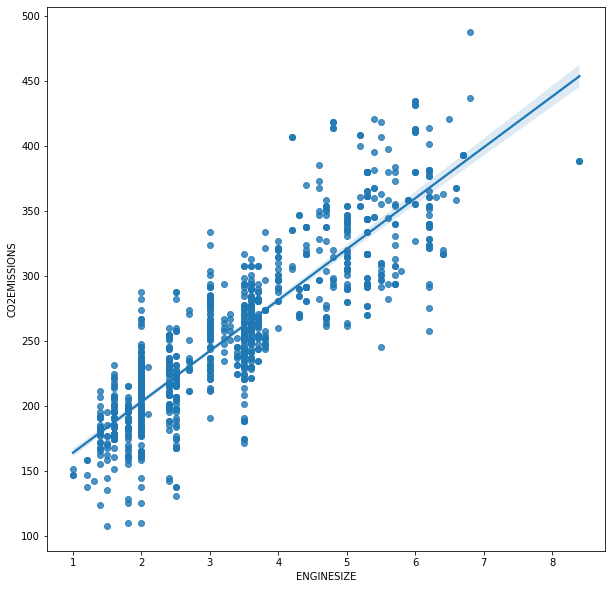

In [11]:
plt.figure(figsize=(10, 10))
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.show()

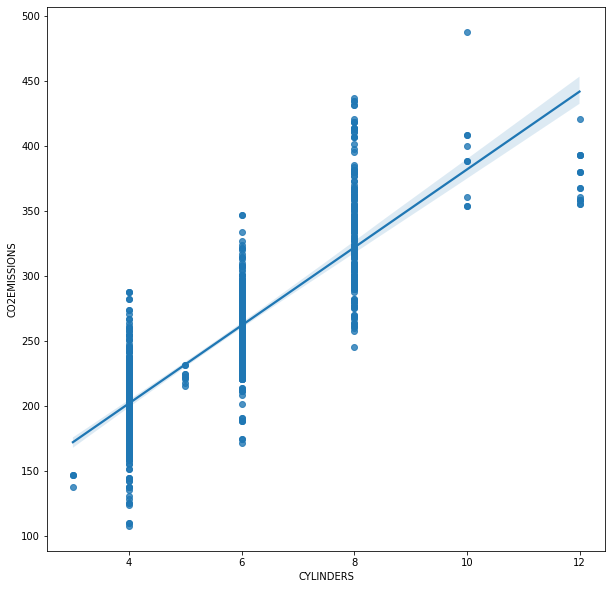

In [14]:
plt.figure(figsize=(10, 10))
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.show()

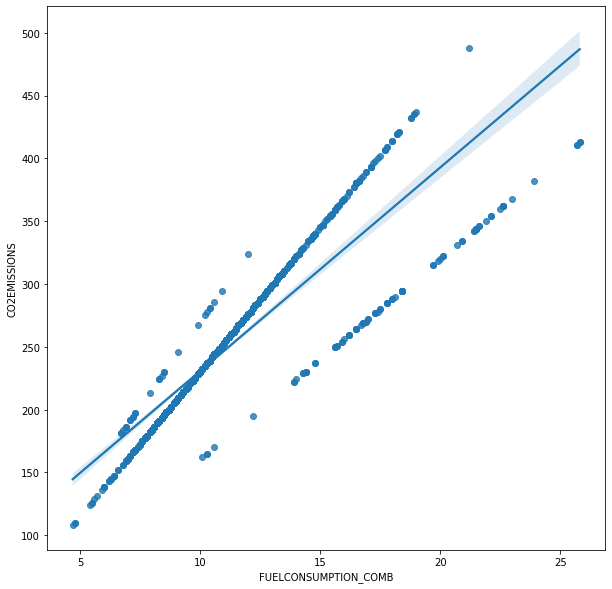

In [15]:
plt.figure(figsize=(10, 10))
sns.regplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=df)
plt.show()

## Train/Test Split

In [18]:
y_data = df[['CO2EMISSIONS']]
y_data.head(2)

,CO2EMISSIONS
0,196
1,221


In [19]:
x_data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
x_data.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


## The Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('La constante del modelo es:', lr.intercept_)

La constante del modelo es: [65.17950048]


In [25]:
print('Los coeficientes del modelo son:', lr.coef_)

Los coeficientes del modelo son: [[11.56295409  6.91231122  9.72527271]]


## Evaluation

In [27]:
yhat = lr.predict(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

In [28]:
#R^2
lr.score(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], y_test)

0.8653355812644816

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(y_test, yhat)
print(mse)

546.2591396903441


# Conclusion 

In this model we analyzed a model to explain the CO2 emissions based on three different features. In this example, we analyzed the relations between Enginsize, Culinders and Fuel consumption and CO2 emissions. Then we made an out of sample evaluation and calculated the R^2 and the mean squared error.